# Credit Card Approval

* Data Source: [Kaggle - Credit Card Approval (Clean version)](https://www.kaggle.com/code/salsabilanmahmudah/cca-ann)
* Author: Huu Phuc (Felix) Hong
* Last Update: 10 November, 2023

# Introduction

The dataset, including 690 non-null entries and 16 columns, represents a collection of credit card applications, where each entry includes various attributes about the applicant and a label indicating whether the application was approved or denied. The attributes encompass a mix of numerical and categorical features. The purpose of this project is to review the application using machine learning models and provide approval results for individual credit card application

### Data Understanding

* Male: 0 = female, 1 = male
* Age: age in years
* Debt: debt remaining
* Married: 0 = not married, 1 = married
* Bank Customer: 0 = Does not have bank account, 1 = has a bank account
* Industry: Job sector of employment
* Ethnicity: ethnicity
* Years Employed: employment duration in years
* Prior default: 0 = no prior defaults, 1 = prior default
* Employed: 0 = unemployed, 1 = employed
* Credit Score: individual credit score
* Drivers License: 0 = no license, 1 = has license
* Citizen: type of citizenship
* ZipCode: zipcode
* Income: income
* Approved: 0 = not approved, 1 = approved

# Data Import

In [21]:
# Library for analysis and visualization
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats

In [22]:
# Import dataset
df = pd.read_csv('cc_approvals.csv')
df.rename(columns={"Gender":"Male"}, inplace=True)

## Data Preparation

We can see that there are no missing data in the dataset

In [23]:
# Data overall information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 690 entries, 0 to 689
Data columns (total 16 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Male            690 non-null    int64  
 1   Age             690 non-null    float64
 2   Debt            690 non-null    float64
 3   Married         690 non-null    int64  
 4   BankCustomer    690 non-null    int64  
 5   Industry        690 non-null    object 
 6   Ethnicity       690 non-null    object 
 7   YearsEmployed   690 non-null    float64
 8   PriorDefault    690 non-null    int64  
 9   Employed        690 non-null    int64  
 10  CreditScore     690 non-null    int64  
 11  DriversLicense  690 non-null    int64  
 12  Citizen         690 non-null    object 
 13  ZipCode         690 non-null    int64  
 14  Income          690 non-null    int64  
 15  Approved        690 non-null    int64  
dtypes: float64(3), int64(10), object(3)
memory usage: 86.4+ KB


In [24]:
(df == "?").sum()

Male              0
Age               0
Debt              0
Married           0
BankCustomer      0
Industry          0
Ethnicity         0
YearsEmployed     0
PriorDefault      0
Employed          0
CreditScore       0
DriversLicense    0
Citizen           0
ZipCode           0
Income            0
Approved          0
dtype: int64

In [25]:
# Let's take a look at data
df.head()

,Male,Age,Debt,Married,BankCustomer,Industry,Ethnicity,YearsEmployed,PriorDefault,Employed,CreditScore,DriversLicense,Citizen,ZipCode,Income,Approved
0,1,30.83,0.000,1,1,Industrials,White,1.25,1,1,1,0,ByBirth,202,0,1
1,0,58.67,4.460,1,1,Materials,Black,3.04,1,1,6,0,ByBirth,43,560,1
2,0,24.50,0.500,1,1,Materials,Black,1.50,1,0,0,0,ByBirth,280,824,1
3,1,27.83,1.540,1,1,Industrials,White,3.75,1,1,5,1,ByBirth,100,3,1
4,1,20.17,5.625,1,1,Industrials,White,1.71,1,0,0,0,ByOtherMeans,120,0,1


# Function Declaration

In [26]:
# Function declaration for displaying binary features vs Approved column
def display_per(colname, dis):
    
    # Chi-Square test
    observed_data = pd.crosstab(df[colname], df['Approved'])
    chi2, p, _, _ = stats.chi2_contingency(observed_data)

    print("Chi-Square Statistic:", chi2)
    print("P-value:", p)

    # Filter the DataFrame based on colname
    positive_mask = df[colname] == 1
    negative_mask = ~positive_mask

    # Calculate approval percentages
    pos_approve = np.mean(df.loc[positive_mask, "Approved"]) * 100
    neg_approve = np.mean(df.loc[negative_mask, "Approved"]) * 100

    # Create a stacked bar plot for visualization
    labels = dis
    percentages = np.array([pos_approve, neg_approve])
    not_approved = 100 - percentages

    plt.bar(labels, percentages, label='Approved', color='green')
    plt.bar(labels, not_approved, bottom=percentages, label='Not Approved', color='red')

    # Add labels to the bars
    for i, (p, na) in enumerate(zip(percentages, not_approved)):
        plt.text(labels[i], p/2, f"{p:.2f}%", ha='center', va='center', color='white', fontsize=12)
        plt.text(labels[i], p + na/2, f"{na:.2f}%", ha='center', va='center', color='black', fontsize=12)

    plt.ylabel('Percentage')
    plt.title('Credit Card Approval by Group')
    plt.legend()
    plt.show()

In [27]:
# Function declaration for displaying categorical column vs Approved column
def stacked_bar_plot_with_labels(df, colname, title):
    
    # Chi-Square test
    observed_data = pd.crosstab(df[colname], df['Approved'])
    chi2, p, _, _ = stats.chi2_contingency(observed_data)

    print("Chi-Square Statistic:", chi2)
    print("P-value:", p)

    # Calculate the total counts for each category in the specified column
    category_counts = df[colname].value_counts()
    
    # Calculate the total approvals for each category in the specified column
    category_approvals = df.groupby(colname)['Approved'].sum()
    
    # Calculate the percentages
    percentage_approvals = (category_approvals / category_counts) * 100
    percentage_non_approvals = 100 - percentage_approvals
    
    # Create a DataFrame to hold the percentages and sort by approval percentage
    result_df = pd.DataFrame({colname: percentage_approvals.index, 'Percentage_Approval': percentage_approvals})
    result_df = result_df.sort_values(by='Percentage_Approval', ascending=False)
    
    # Create a stacked bar plot
    categories = result_df[colname]
    percentage_approvals = result_df['Percentage_Approval']
    percentage_non_approvals = 100 - percentage_approvals

    plt.figure(figsize=[9, 4])
    plt.bar(categories, percentage_approvals, label='Approved', color='green')
    plt.bar(categories, percentage_non_approvals, bottom=percentage_approvals, label='Not Approved', color='red')
    
    # Add labels to the bars
    for i, (_, p, na) in enumerate(zip(categories, percentage_approvals, percentage_non_approvals)):
        plt.text(i, p / 2, f"{p:.2f}%", ha='center', va='center', color='white', fontsize=6)
        plt.text(i, p + na / 2, f"{na:.2f}%", ha='center', va='center', color='black', fontsize=6)
        
    plt.xlabel(colname)
    plt.ylabel('Percentage')
    plt.title(title)
    plt.legend()
    plt.xticks(rotation=90)
    plt.show()

# EDA

### **Approval Percentage**

#### By Gender

* From the plot, we see that gender may not be a good candidate for predicting approval status as the percentage of male and female approved request are almost the same
* The p-value of Chi-square testing also shows that it may not be a good candidate for prediction (~0.5 >> 0.001)
* From domain knowledge, I also believe that gender will not affect the approval result

Chi-Square Statistic: 0.45805448554005934
P-value: 0.49853461823239953


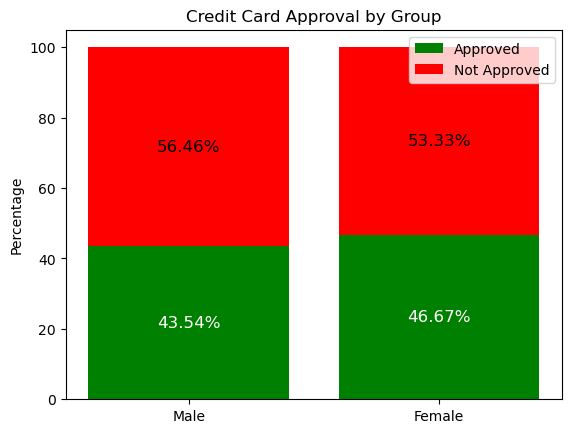

In [28]:
display_per("Male", ["Male", "Female"])

#### By Marriage Status

* In the chart, it is clearly that married people have higher chance to get approval for their credit card
* The p-value of Chi-square test also shows that Marriage status can be a good candidate for approval prediction

Chi-Square Statistic: 21.657270583406618
P-value: 3.259721060211448e-06


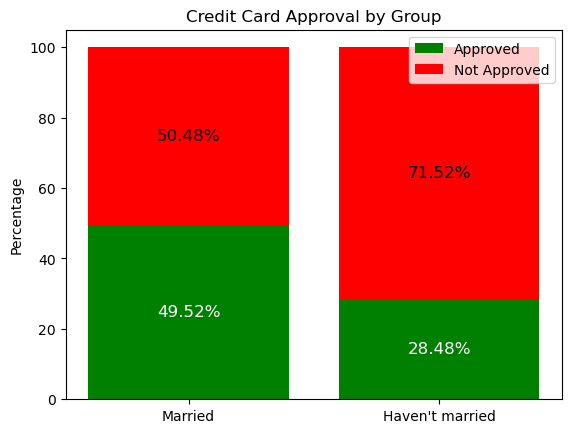

In [29]:
display_per("Married", ["Married", "Haven't married"])

#### By Customer Type

* As marriage status, it is clearly that bank customer have higher chance to get approval for their credit card
* The p-value of Chi-square test also shows that the customer's type is a good candidate for approval prediction

Chi-Square Statistic: 23.751174008329958
P-value: 1.096284841948764e-06


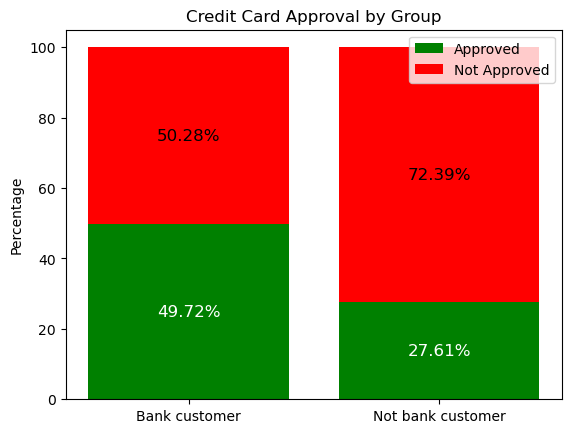

In [30]:
display_per("BankCustomer", ["Bank customer", "Not bank customer"])

#### Default Status

* From the bar chart, people with prior default get higher chance to be approved for credit card
* From the p-value of Chi-squared test, default status is a good candidate for prediction

**Potential problems**
* From my knowledge, people with prior default status actually will have lower chance of getting approval. However, the data tells a different story. There maybe data problems such as mislabelling, flaws in data collection, etc. which cause the conflict between data and domain knowledge
* In this case, I will just proceed as normal and don't have any modifications made to the data because of insufficient evidence

Chi-Square Statistic: 355.2038167412799
P-value: 3.1185900878457007e-79


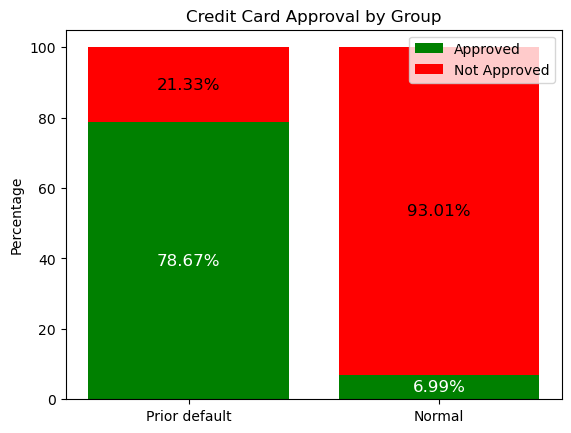

In [31]:
display_per("PriorDefault", ["Prior default", "Normal"])

#### By Employment Status

* From the chart, employees have higher chance of getting approval
* From p-value of the chi-squared test, employment status is a good candidate for prediction

Chi-Square Statistic: 143.06956205083148
P-value: 5.6757273745274924e-33


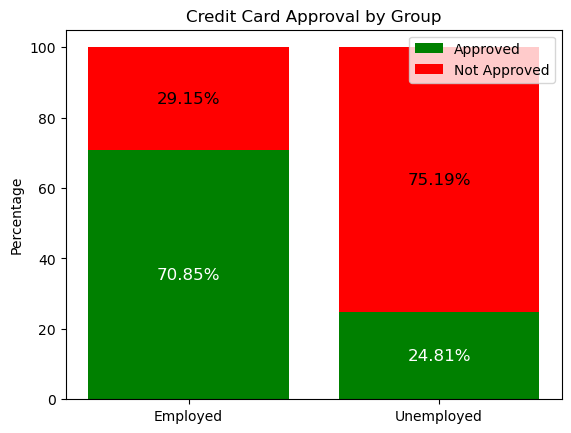

In [32]:
display_per("Employed", ["Employed", "Unemployed"])

#### Driver License Holding

* From the chart, there is no clear indication that people holding driver licence get higher chance of getting approval
* From p-value of the chi-squared test, driver license is not a good candidate for prediction
* In my opinion, holding driver license should not affect the chance for getting approval

Chi-Square Statistic: 0.568273300792113
P-value: 0.45094587758631943


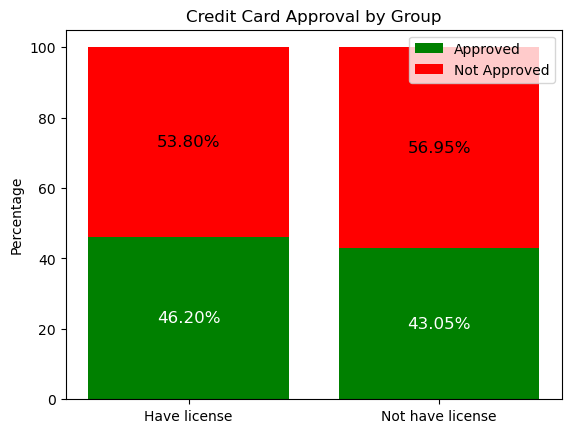

In [33]:
display_per("DriversLicense", ["Have license", "Not have license"])

#### By ZipCode

* From the plot, it is not much different about approval status among different zip codes
* From the p-value of Chi-squared test, it is not small enough to prove that ZipCode can be a good candidate for prediction
* From my perspective, zipcode itself cannot affect the approval status of a person

Chi-Square Statistic: 218.26810460679565
P-value: 0.006354824252183887


<Axes: xlabel='Approved', ylabel='ZipCode'>

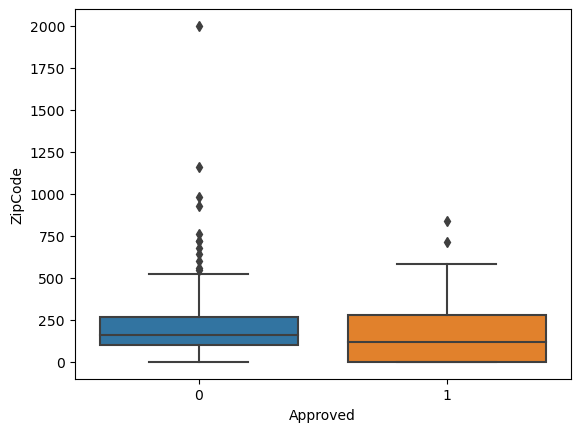

In [34]:
# Chi-Square test
observed_data = pd.crosstab(df["ZipCode"], df['Approved'])
chi2, p, _, _ = stats.chi2_contingency(observed_data)

print("Chi-Square Statistic:", chi2)
print("P-value:", p)

# Plot relationship
sns.boxplot(df,x="Approved",y="ZipCode")

#### By Industry

* From the chart, it shows that there is a differences between industries in terms of getting approval, while people working in Utilities industry get around 85% of approval status, Healthcare sector just get 13%
* From the p-value of Chi-squared test, the feature is good for prediction

Chi-Square Statistic: 98.32324271210467
P-value: 3.502987066102028e-15


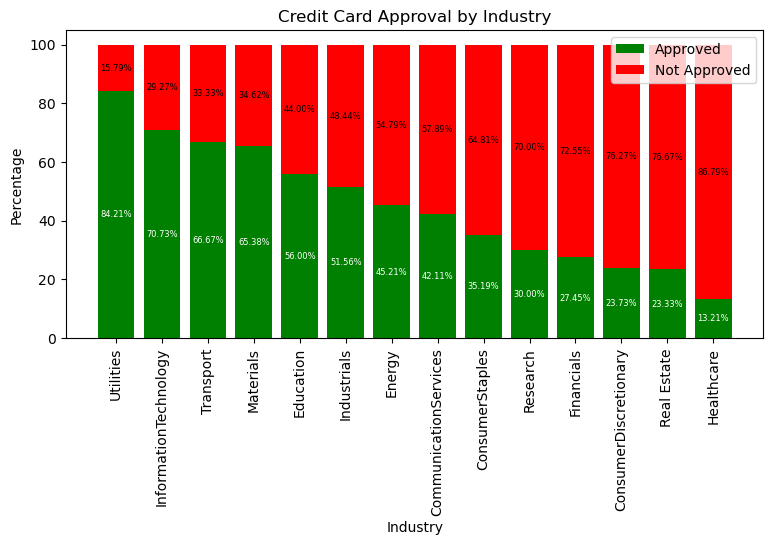

In [35]:
stacked_bar_plot_with_labels(df, 'Industry', 'Credit Card Approval by Industry')

#### By Ethnicity

* From the chart, it shows that there is a differences between ethnicities in terms of getting approval
* From the p-value of Chi-squared test, the feature is good for prediction

Chi-Square Statistic: 41.813242193252435
P-value: 1.823665654934678e-08


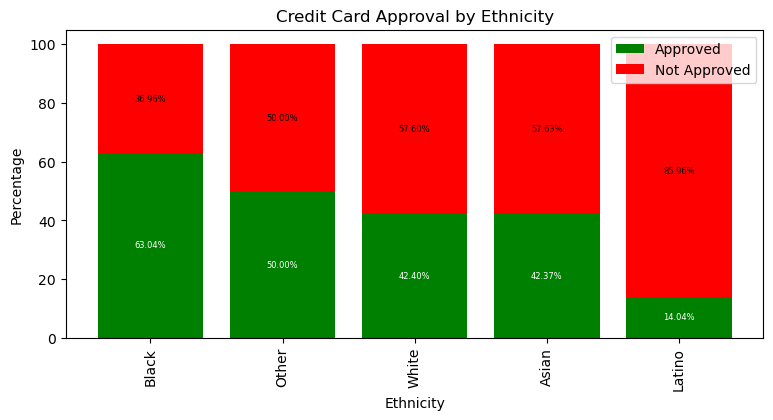

In [36]:
stacked_bar_plot_with_labels(df, 'Ethnicity', 'Credit Card Approval by Ethnicity')

#### By Citizen

* From the chart, it shows that there is a differences between citizens in terms of getting approval
* From the p-value of Chi-squared test, the feature is not good for prediction
* From my perspective, citizen should not be considered as a factor for approval

Chi-Square Statistic: 9.191570451545385
P-value: 0.010094291370456357


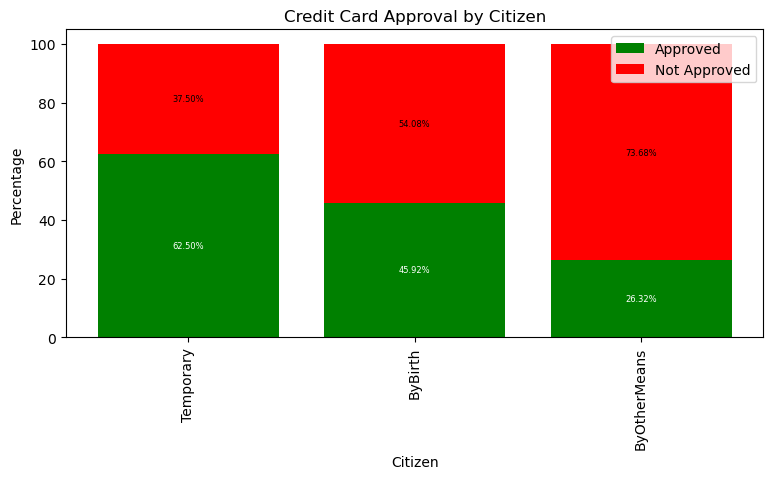

In [37]:
stacked_bar_plot_with_labels(df, 'Citizen', 'Credit Card Approval by Citizen')

From analysis above, we will remove Male, ZipCode, DriverLicense and Citizen column

In [38]:
# Remove column
df_process = df.drop(['Male','ZipCode','Citizen','DriversLicense'], axis=1)

# One-hot coding for categorical nominal data
df_process = pd.get_dummies(df_process, columns=['Industry', 'Ethnicity'])

In [39]:
df_process.to_csv("cc_approvals_processed.csv", index=False)